In [4]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
# Configurações de estilo para os gráficos
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (14, 6)
plt.rcParams['font.size'] = 12

In [6]:
# Carregar os dados
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Converter a coluna de data
df['date'] = pd.to_datetime(df['date'])

# Filtrar países e período
paises = ['United States', 'United Kingdom', 'Brazil', 'India', 'South Africa']
dados = df[df['location'].isin(paises)]
dados = dados[(dados['date'] >= '2020-03-01') & (dados['date'] <= '2024-05-31')]

# Selecionar colunas relevantes
colunas = ['location', 'date', 'new_cases_per_million', 'new_cases_smoothed_per_million',
           'new_deaths_per_million', 'new_deaths_smoothed_per_million',
           'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred',
           'population', 'reproduction_rate', 'icu_patients_per_million',
           'hosp_patients_per_million', 'stringency_index']

dados = dados[colunas]

In [7]:
# Função para plotar gráficos comparativos
def plot_comparison(metric, title, ylabel, log_scale=False):
    plt.figure(figsize=(15, 8))
    for pais in paises:
        pais_dados = dados[dados['location'] == pais]
        plt.plot(pais_dados['date'], pais_dados[metric], label=pais)

    plt.title(title)
    plt.xlabel('Data')
    plt.ylabel(ylabel)
    plt.legend()
    if log_scale:
        plt.yscale('log')
    plt.grid(True, which="both", ls="-")
    plt.tight_layout()
    plt.show()

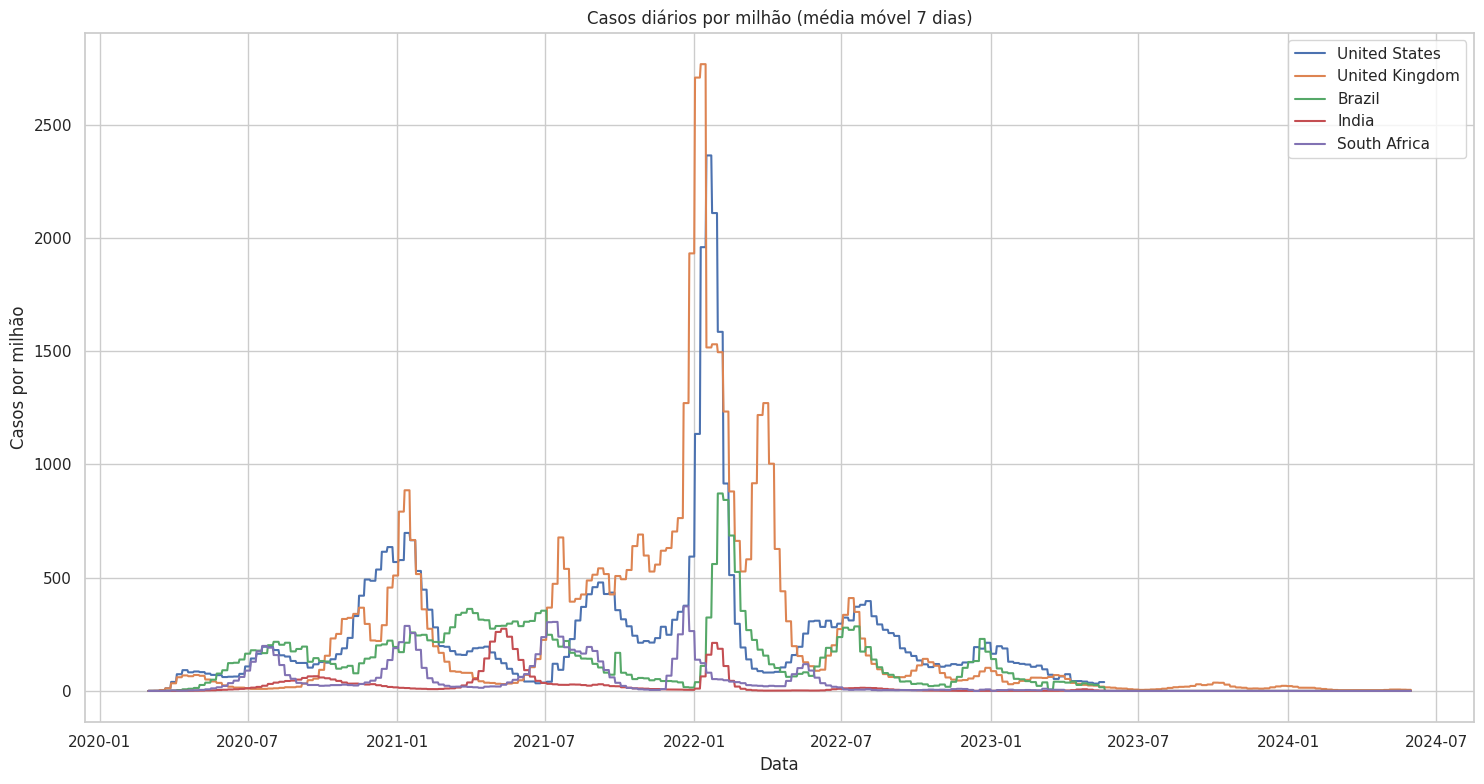

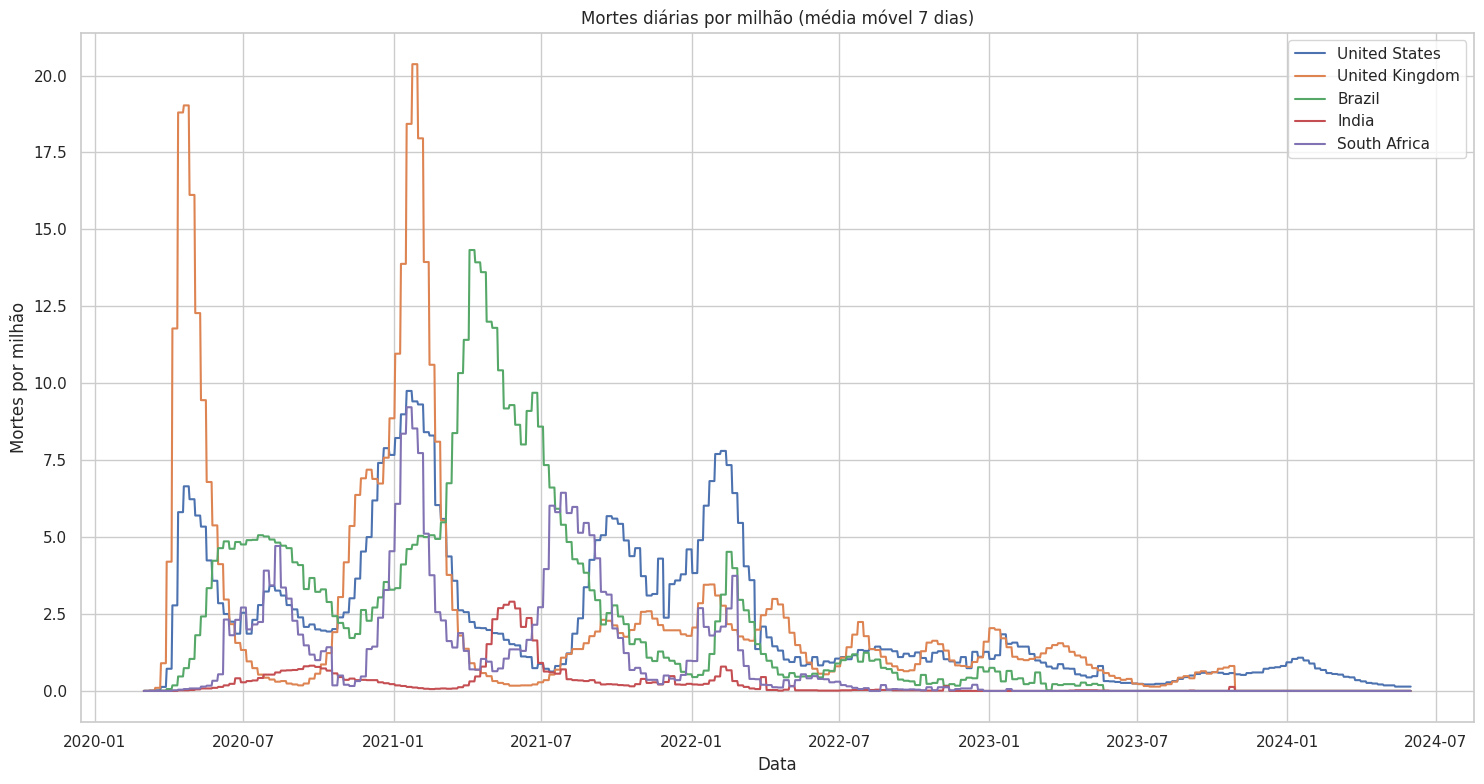

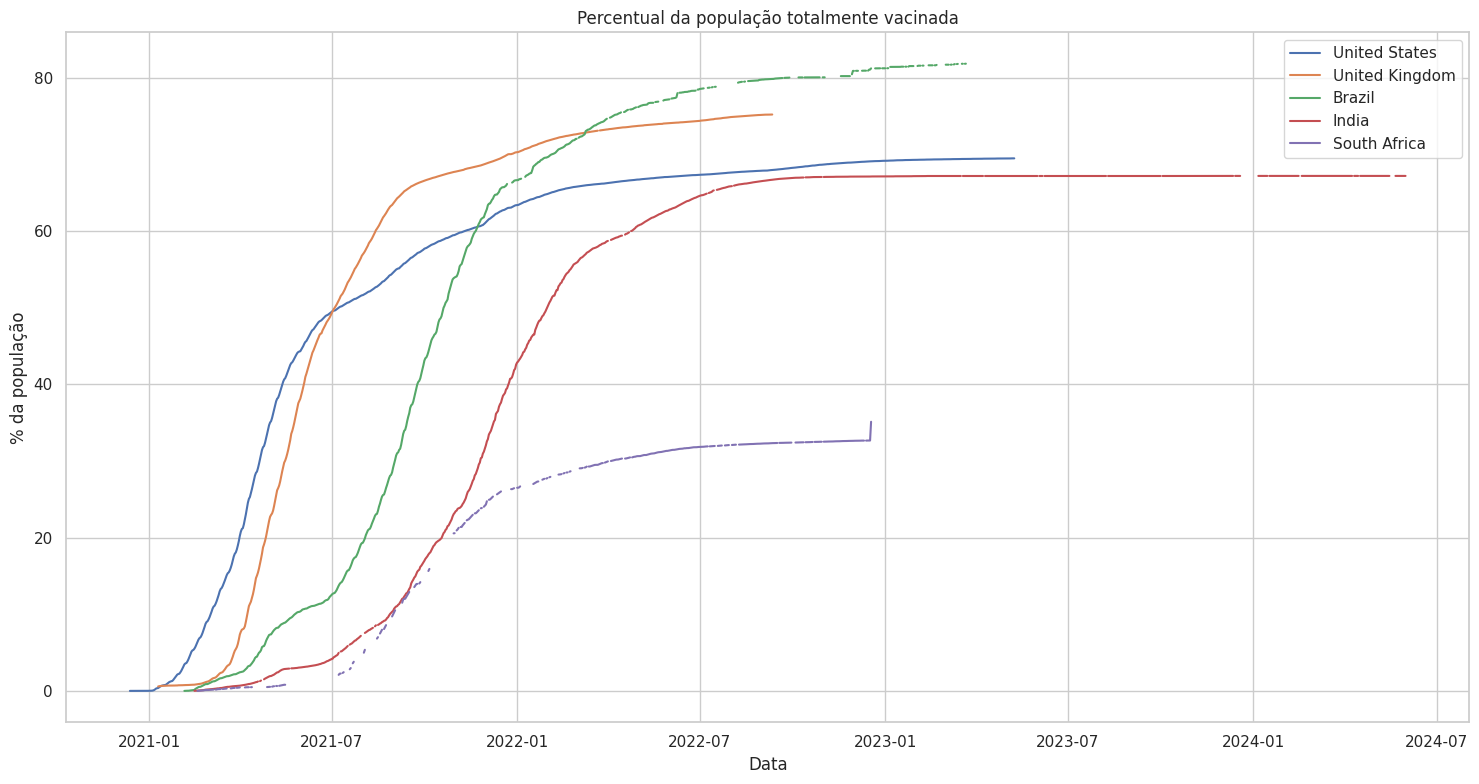

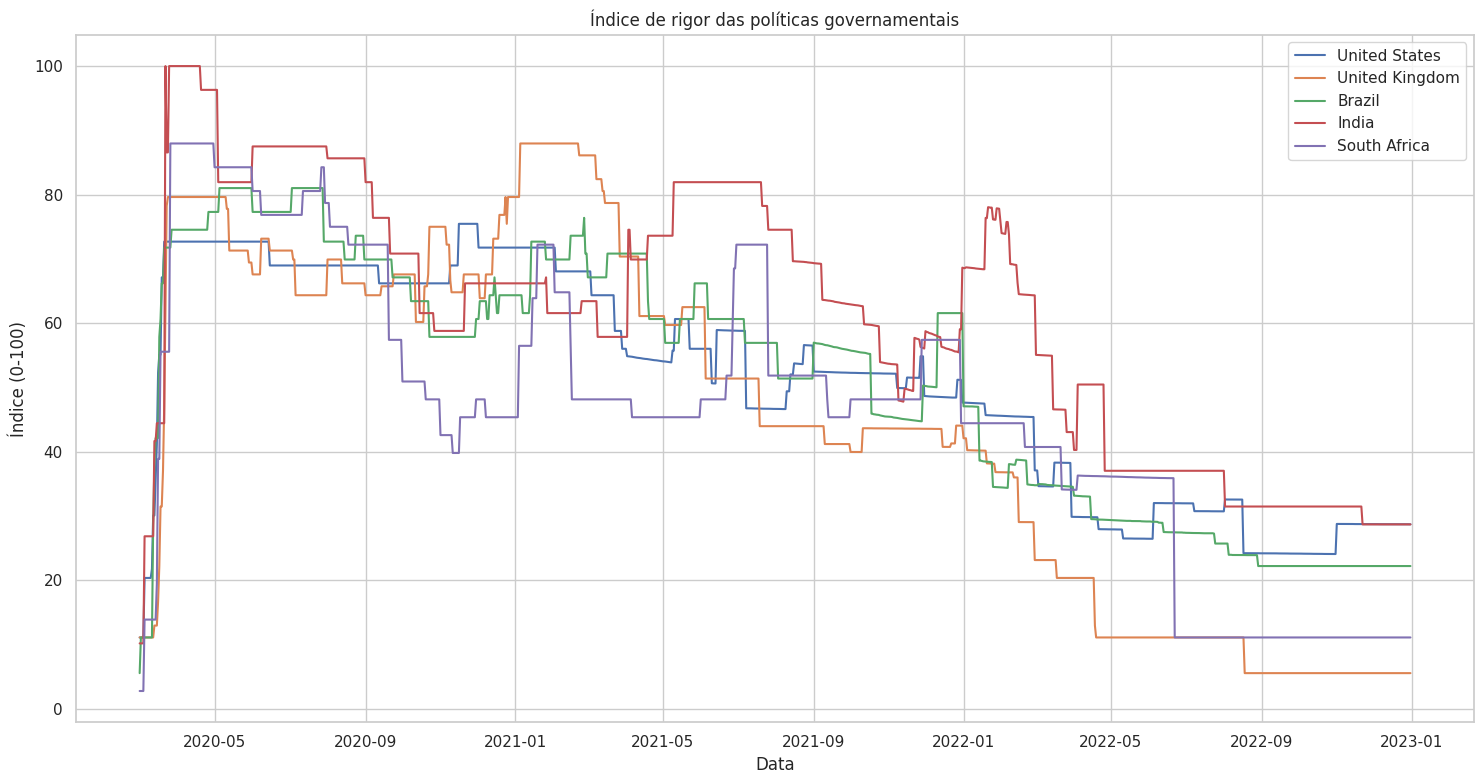

In [8]:
# Gráfico 1: Casos por milhão (suavizados)
plot_comparison('new_cases_smoothed_per_million',
               'Casos diários por milhão (média móvel 7 dias)',
               'Casos por milhão')

# Gráfico 2: Mortes por milhão (suavizadas)
plot_comparison('new_deaths_smoothed_per_million',
               'Mortes diárias por milhão (média móvel 7 dias)',
               'Mortes por milhão')

# Gráfico 3: Vacinação completa
plot_comparison('people_fully_vaccinated_per_hundred',
               'Percentual da população totalmente vacinada',
               '% da população')

# Gráfico 4: Índice de rigor das políticas
plot_comparison('stringency_index',
               'Índice de rigor das políticas governamentais',
               'Índice (0-100)')

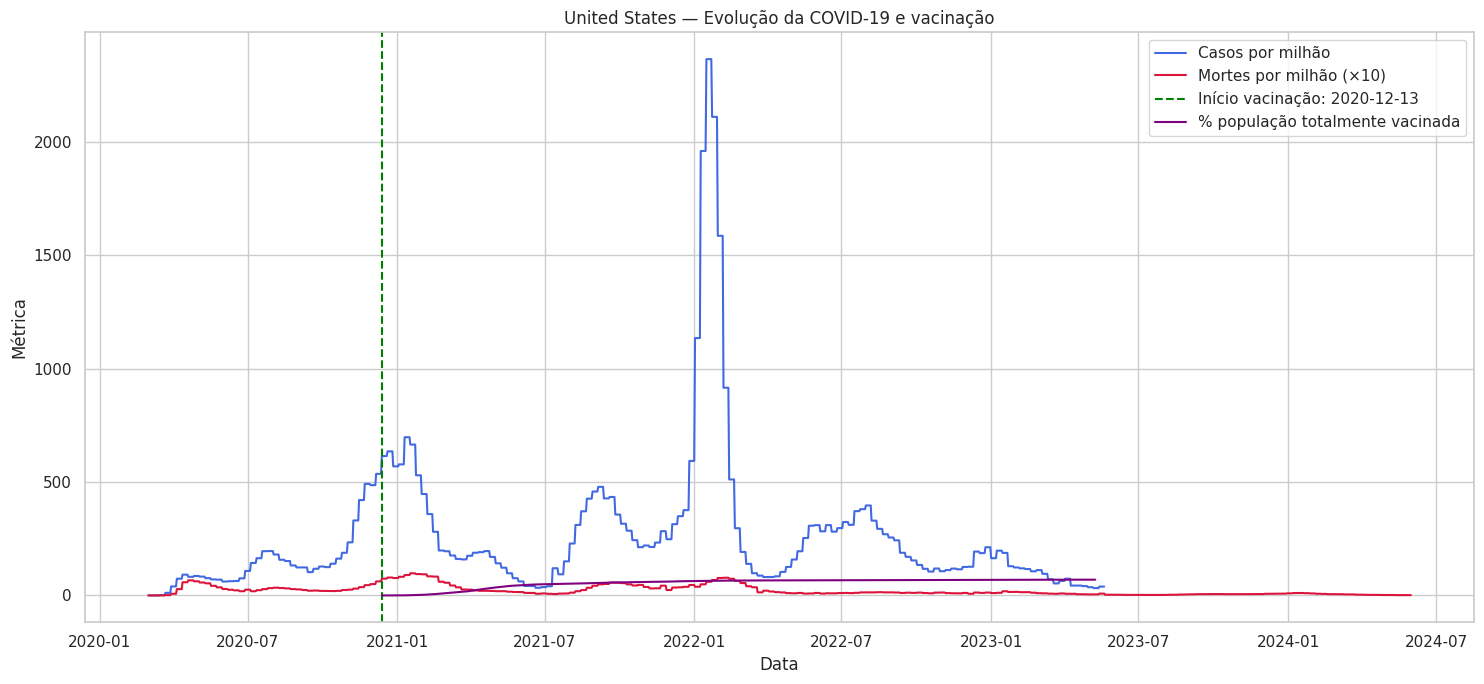

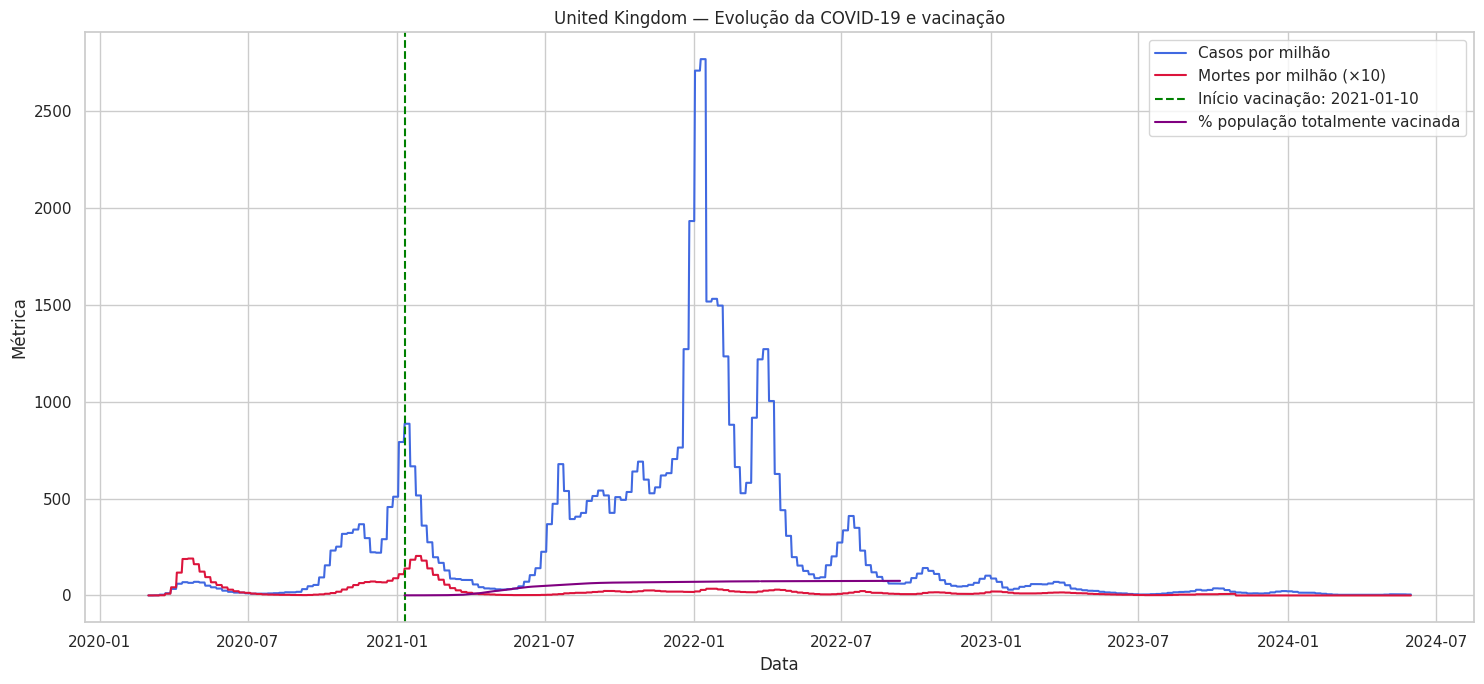

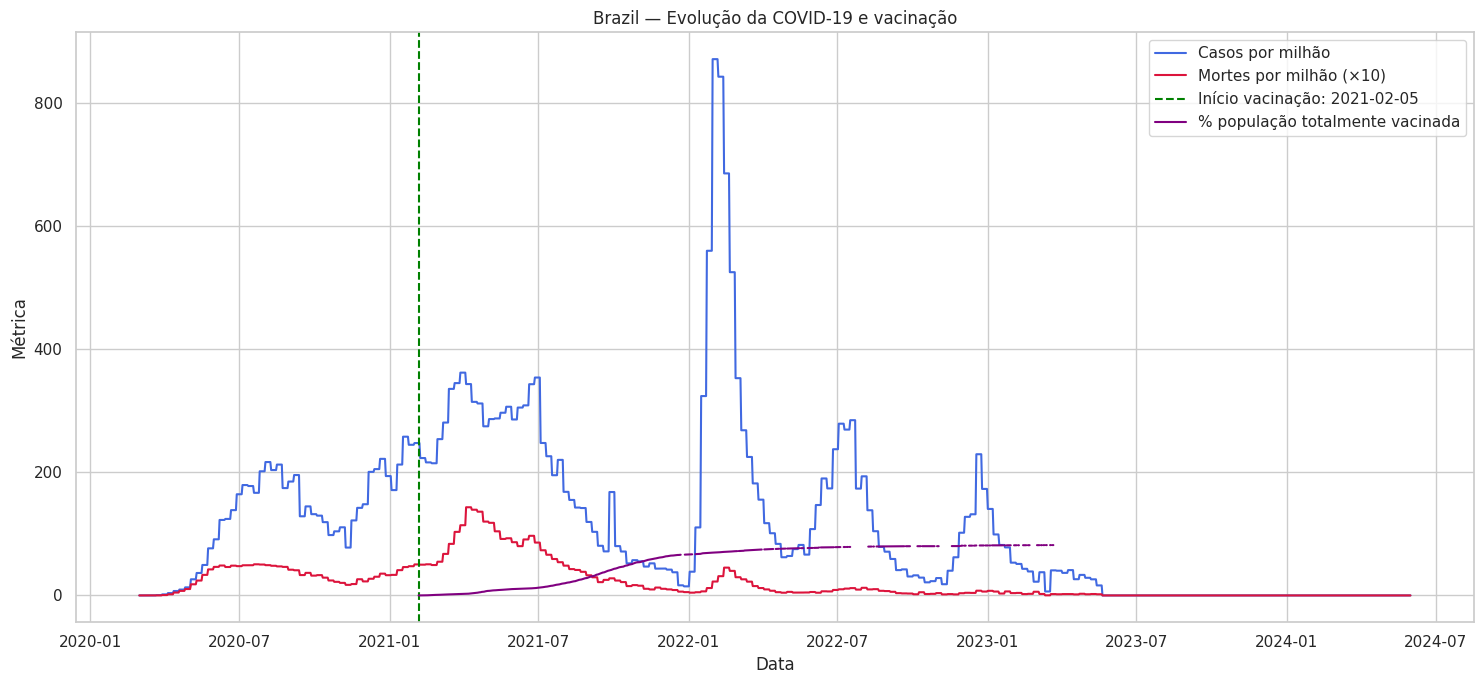

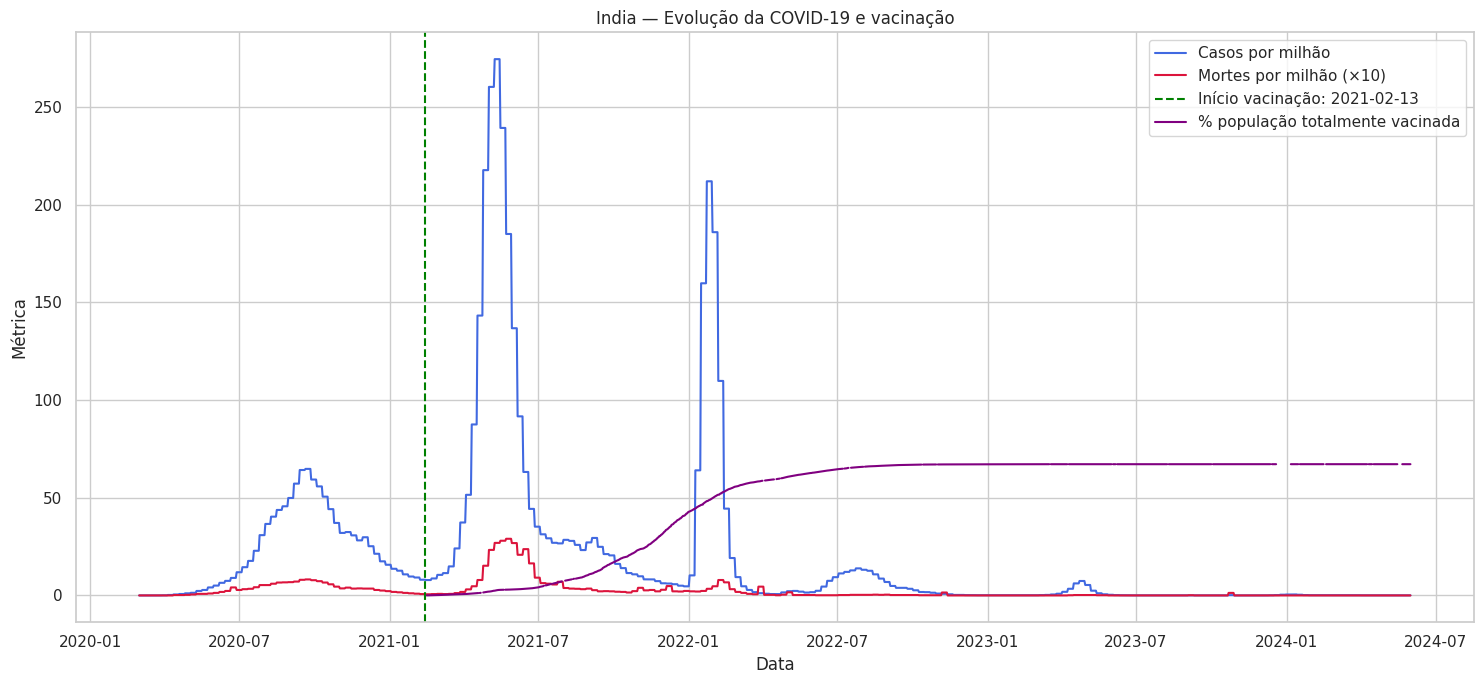

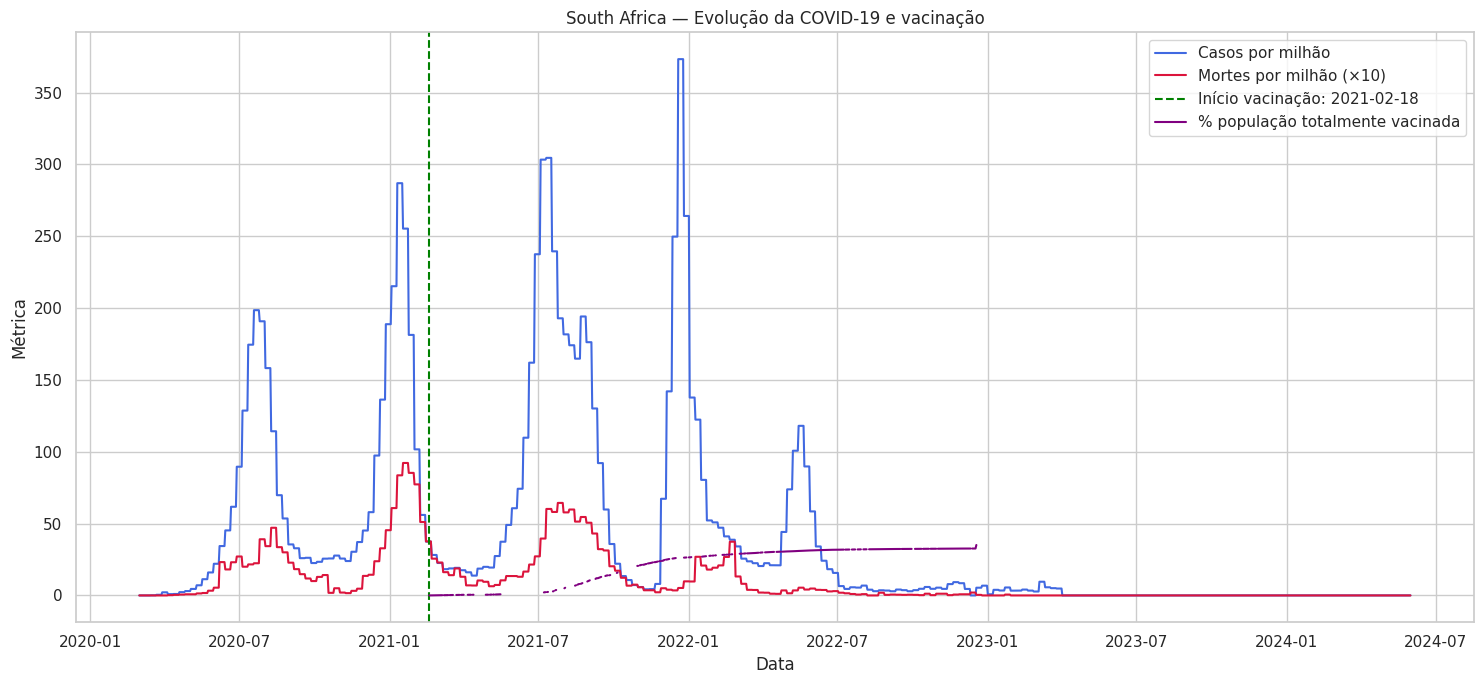

In [9]:
# Análise por país com detalhes de vacinação
for pais in paises:
    pais_dados = dados[dados['location'] == pais]

    # Data de início da vacinação
    inicio_vac = pais_dados[pais_dados['people_fully_vaccinated_per_hundred'].notna()].date.min()

    plt.figure(figsize=(15, 7))

    # Casos e mortes
    plt.plot(pais_dados['date'], pais_dados['new_cases_smoothed_per_million'],
             label='Casos por milhão', color='royalblue')
    plt.plot(pais_dados['date'], pais_dados['new_deaths_smoothed_per_million']*10,
             label='Mortes por milhão (×10)', color='crimson')

    # Linha de vacinação
    if pd.notna(inicio_vac):
        plt.axvline(inicio_vac, color='green', linestyle='--',
                   label=f'Início vacinação: {inicio_vac.date()}')

    # Vacinação completa
    plt.plot(pais_dados['date'], pais_dados['people_fully_vaccinated_per_hundred'],
             label='% população totalmente vacinada', color='purple')

    plt.title(f'{pais} — Evolução da COVID-19 e vacinação')
    plt.xlabel('Data')
    plt.ylabel('Métrica')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()